# Converting ADC data to FFT and numpy array (Baby present - testing)

## ADC data is converted to fft and normalised and converted to numpy array as it is easier for handling large datas

In [12]:
import os
import numpy as np
import pandas as pd
from scipy import fftpack
import matplotlib.pyplot as plt


# Uncomment the path here and at the end, based on which data is being used

#present_dir = '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/'
present_dir = '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/'
#present_dir = '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_all_test/'

# Fetch all the files for baby present data which will be used for training

file_paths_present = []

all_files = os.listdir(present_dir)    
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
for i in csv_files:
    file_path = present_dir + i
    file_paths_present.append(file_path)
file_paths_present

['/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/adc_SCRAF_5000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/68.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/6.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/54.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/40.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/41.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/7.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/55.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/69.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/43.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_ScarfBlanket_test/57.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/A

In [13]:
# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file paths and append each DataFrame to the list
for file in file_paths_present:
    df = pd.read_csv(file, header=None, index_col=False)
    dfs.append(df)

# Concatenate all the DataFrames in the list
combined_df_present = pd.concat(dfs, ignore_index=True)
train_present_len = len(combined_df_present)
print(train_present_len)
combined_df_present

24400


,0,1,2,3,4,5,6,7,8,9,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,64,32768,1,1,512,0,1953125,12,0.0,0,...,-144,-141,-139,-135,-131,-128,-127,-124,-127,-125
1,64,32768,1,1,512,0,1953125,12,0.0,0,...,-128,-136,-137,-140,-143,-141,-149,-151,-155,-158
2,64,32768,1,1,512,0,1953125,12,0.0,0,...,-151,-146,-142,-141,-138,-133,-131,-131,-129,-125
3,64,32768,1,1,512,0,1953125,12,0.0,0,...,-162,-157,-154,-151,-147,-140,-141,-133,-129,-130
4,64,32768,1,1,512,0,1953125,12,0.0,0,...,-174,-171,-165,-160,-157,-149,-144,-138,-137,-133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24395,64,32768,1,1,512,0,1953125,12,0.0,34,...,-136,-139,-141,-148,-152,-151,-156,-163,-163,-163
24396,64,32768,1,1,512,0,1953125,12,0.0,34,...,-134,-132,-133,-139,-142,-142,-140,-141,-146,-152
24397,64,32768,1,1,512,0,1953125,12,0.0,34,...,-125,-125,-124,-122,-123,-125,-127,-127,-130,-135
24398,64,32768,1,1,512,0,1953125,12,0.0,34,...,-162,-167,-172,-169,-172,-173,-174,-177,-180,-180


In [14]:
print(f"Length of combined data frame: {len(combined_df_present)}")

# Get the shape of the DataFrame
shape = combined_df_present.shape

# Number of rows
num_rows = shape[0]

# Number of columns
num_columns = shape[1]

# Print the number of rows and columns
print("Number of rows baby present:", num_rows)
print("Number of columns baby present:", num_columns)

Length of combined data frame: 24400
Number of rows baby present: 24400
Number of columns baby present: 16400


In [15]:
# Skip header data and consider only adc data for fft calculation
adc_data_selected_present = combined_df_present.iloc[:, 16:].mean(axis=1)
adc_data_selected_present

0       -153.402588
1       -152.597290
2       -155.618408
3       -154.054504
4       -153.742493
            ...    
24395   -152.022888
24396   -152.301758
24397   -151.812500
24398   -150.355896
24399   -147.710510
Length: 24400, dtype: float64

In [16]:
# Convert the pandas Series to a numpy array
adc_array = adc_data_selected_present.to_numpy() 

# Hanning window is chosen
window = np.hanning(len(adc_array))

# Apply the window function to your data
windowed_adc_data = adc_array * window

# Perform FFT on the windowed data
fft_result = np.fft.fft(windowed_adc_data)

sampling_rate = 1000
n = len(adc_array)
freq = np.fft.fftfreq(n, d=1/sampling_rate)
# Calculate the magnitude and phase of the FFT result
magnitude = np.abs(fft_result)
phase = np.angle(fft_result)

# Create a DataFrame
fft_df = pd.DataFrame({
    'Frequency': freq,
    'FFT Magnitude': magnitude,
    'Phase': phase
})


fft_df

,Frequency,FFT Magnitude,Phase
0,0.000000,1.819405e+06,3.141593
1,0.040984,9.061361e+05,0.045354
2,0.081967,5.173043e+04,-1.850785
3,0.122951,5.052289e+04,0.380950
4,0.163934,5.040037e+04,2.595468
...,...,...,...
24395,-0.204918,4.985851e+04,1.485292
24396,-0.163934,5.040037e+04,-2.595468
24397,-0.122951,5.052289e+04,-0.380950
24398,-0.081967,5.173043e+04,1.850785


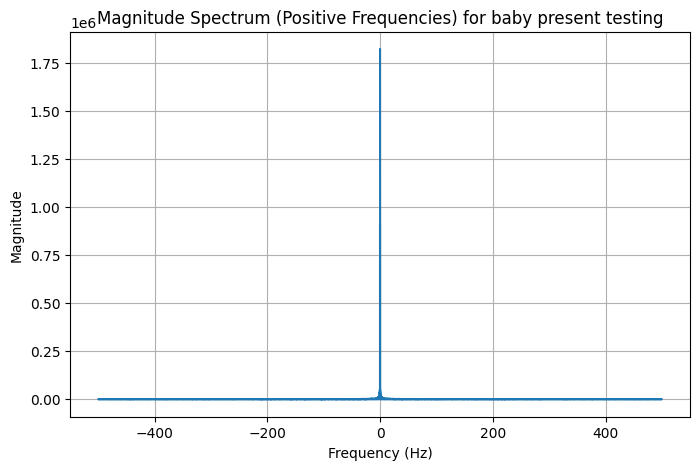

In [17]:
plt.figure(figsize=(8, 5))  # Set the figure size for better readability
plt.plot(fft_df['Frequency'], fft_df['FFT Magnitude'])  # Plot positive frequency vs magnitude
plt.title('Magnitude Spectrum (Positive Frequencies) for baby present testing')  # Title of the plot
plt.xlabel('Frequency (Hz)')  # Label for the x-axis
plt.ylabel('Magnitude')  # Label for the y-axis
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the plot

In [18]:
numpy_array = fft_df.to_numpy()
print(os.getcwd())
# Save the array to a file
#np.save((present_dir+'withbaby_test.npy'), numpy_array)
np.save((present_dir+'withbaby_Scarfblanket_test.npy'), numpy_array)
#np.save((present_dir+'withbaby_all_test.npy'), numpy_array)

/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/code
